# Lead Scoring 

## Logistic Regression

## Problem Statement
An education company named __X Education__ sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. <br>

__When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.__<br>

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. __The typical lead conversion rate at X education is around 30%.__
 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as __‘Hot Leads’__. <br>

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:




__Lead Conversion Process__ - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.<br>

In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. <br>
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

__The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.__


 

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.<br>

__Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.__

 

### Goal


1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [926]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Data Preparation

### Data Loading

In [519]:
data = pd.read_csv("leads.csv")
data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [521]:
data.shape

(9240, 37)

In [523]:
#checking duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0
# No duplicate values

True

In [525]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [527]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [529]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [531]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [533]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [537]:
# we will drop the columns having more than 70% NA values.
data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns, axis=1)

In [511]:
# we will drop the columns having more than 70% NA values.
# Drop columns with more than 70% missing values
null_percent = 100 * (data.isnull().sum() / len(leads_data))
cols_to_drop = null_percent[null_percent > 70].index

leads_data = leads_data.drop(columns=cols_to_drop)


In [513]:
# Now we will take care of null values in each column one by one.

In [515]:
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

In [539]:
data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

<Axes: xlabel='Lead Quality', ylabel='count'>

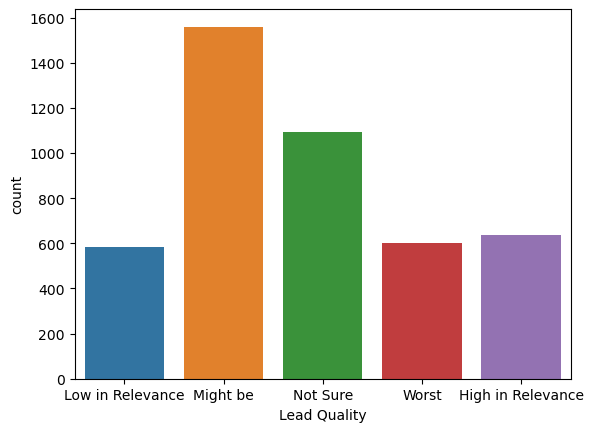

In [543]:
sns.countplot(x='Lead Quality', data=data)

In [545]:
# Asymmetrique Activity Index  |
# Asymmetrique Profile Index   \   An index and score assigned to each customer
# Asymmetrique Activity Score  |    based on their activity and their profile
# Asymmetrique Profile Score   \

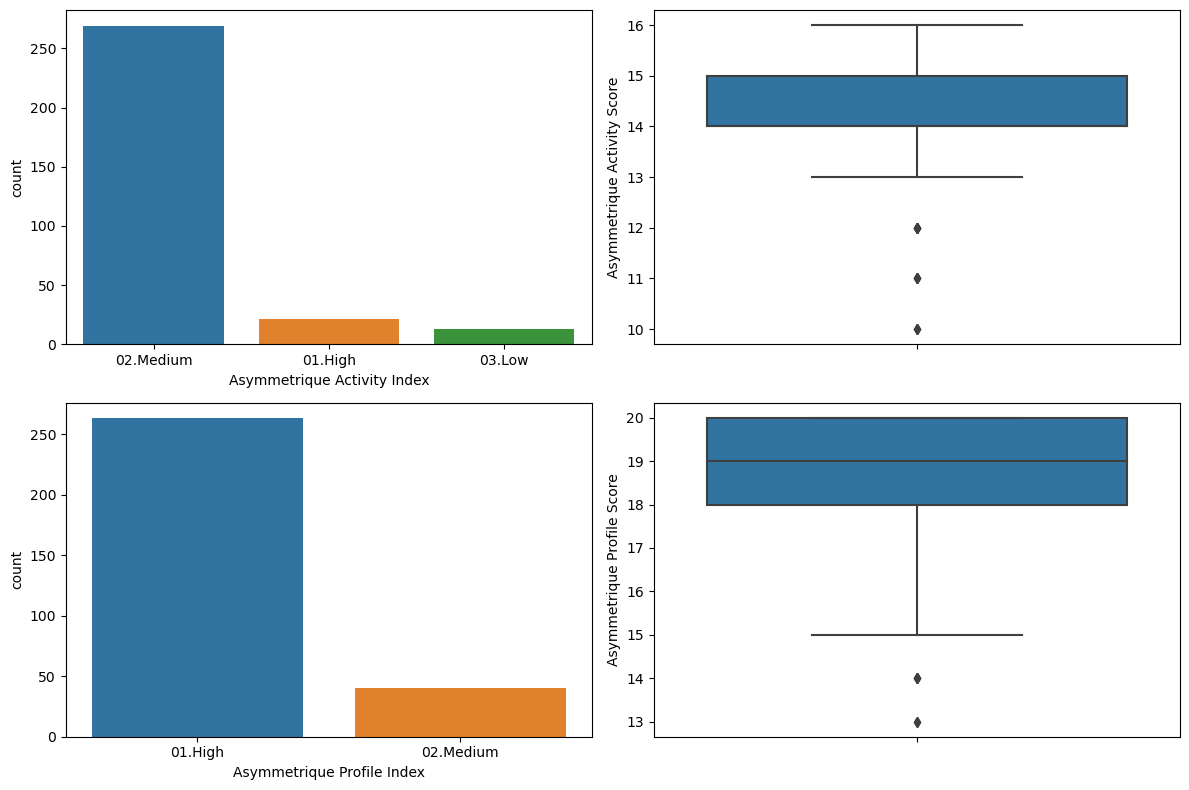

In [549]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Count plot of Asymmetrique Activity Index (categorical)
sns.countplot(x='Asymmetrique Activity Index', data=leads_data, ax=axs[0, 0])

# Plot 2: Box plot of Asymmetrique Activity Score (numerical)
sns.boxplot(y='Asymmetrique Activity Score', data=leads_data, ax=axs[0, 1])

# Plot 3: Count plot of Asymmetrique Profile Index (categorical)
sns.countplot(x='Asymmetrique Profile Index', data=leads_data, ax=axs[1, 0])

# Plot 4: Box plot of Asymmetrique Profile Score (numerical)
sns.boxplot(y='Asymmetrique Profile Score', data=leads_data, ax=axs[1, 1])

plt.tight_layout()
plt.show()


In [551]:
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1)

In [553]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [555]:
# City

In [557]:
data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

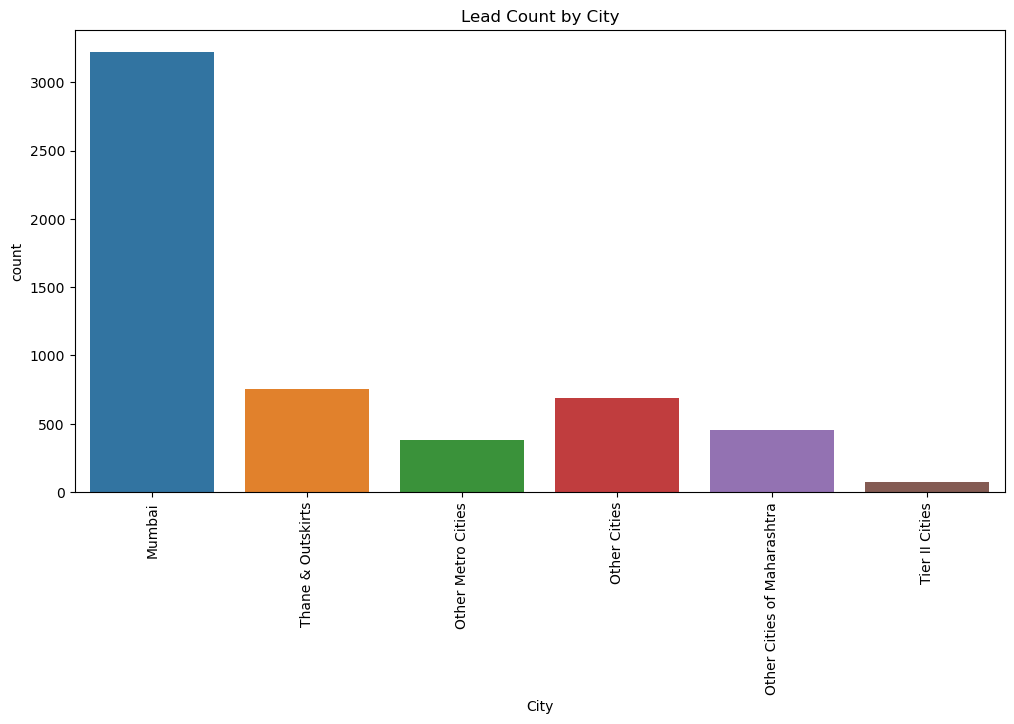

In [559]:
plt.figure(figsize=(12, 6))
sns.countplot(x='City', data=data)
plt.xticks(rotation=90)
plt.title("Lead Count by City")
plt.show()

In [561]:
# Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.

In [563]:
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [565]:
data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

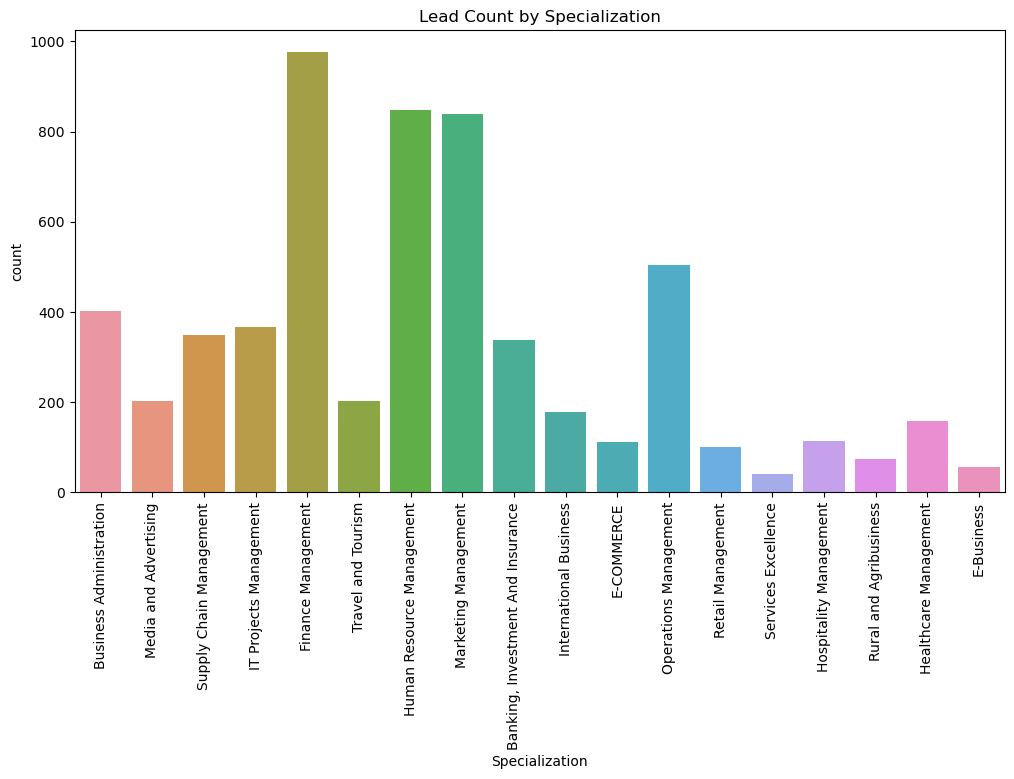

In [567]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Specialization', data=data)
plt.xticks(rotation=90)
plt.title("Lead Count by Specialization")
plt.show()

In [569]:
# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
#  may not have any specialization or is a student.
# Hence we can make a category "Others" for missing values. 

In [571]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [573]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [575]:
# Tags

In [577]:
data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

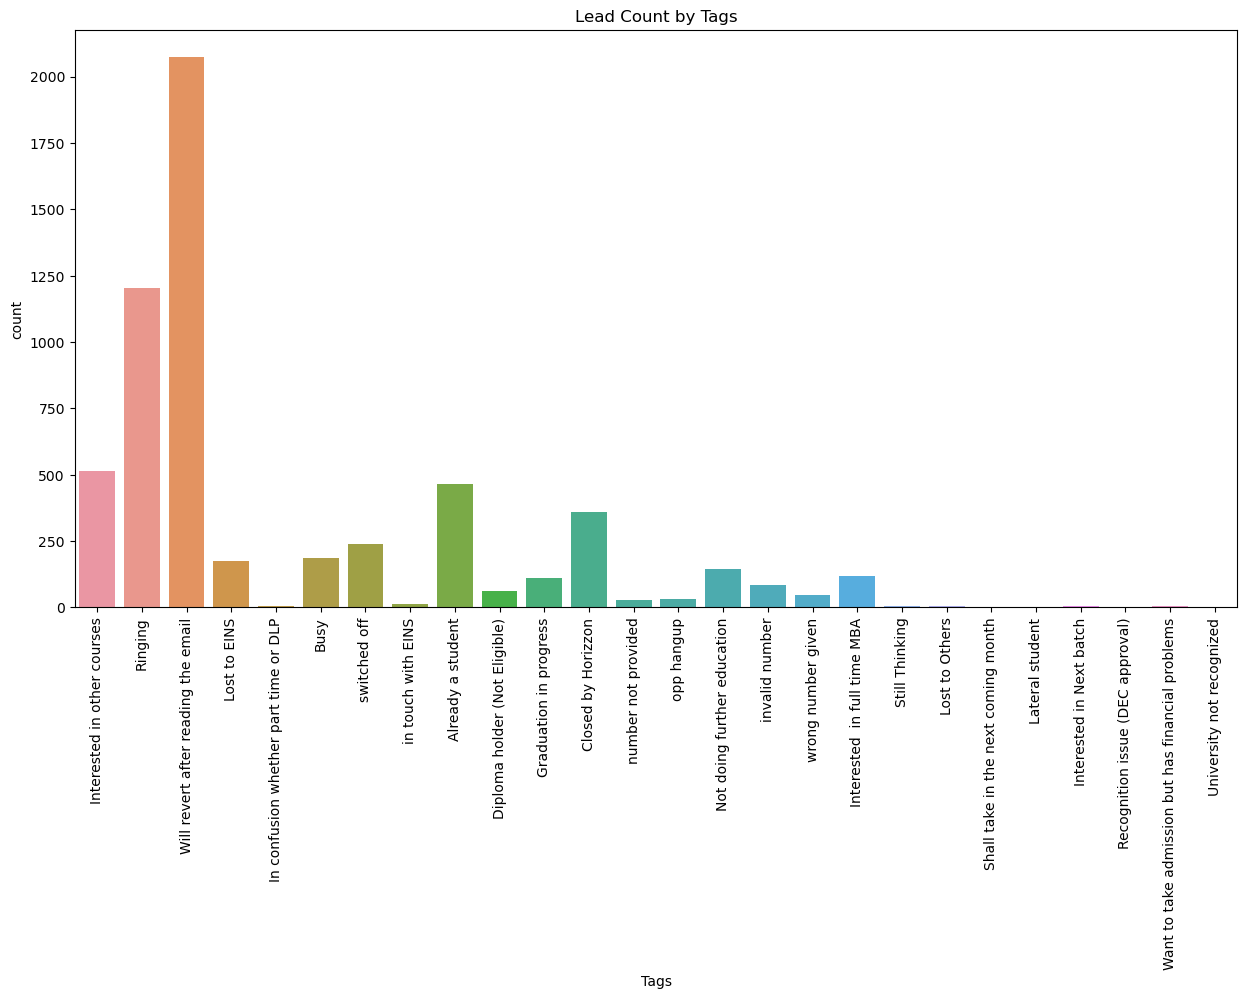

In [579]:
plt.figure(figsize=(15, 7.5))
sns.countplot(x='Tags', data=data)
plt.xticks(rotation=90)
plt.title('Lead Count by Tags')
plt.show()

In [199]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email'.

In [581]:
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [583]:
# What matters most to you in choosing a course

In [587]:
data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [589]:
# Blanks in the this column may be imputed by 'Better Career Prospects'.

In [591]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [211]:
# Occupation

In [593]:
data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [215]:
# 86% entries are of Unemployed so we can impute "Unemployed" in it.

In [595]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [219]:
# Country

In [597]:
# Country is India for most values so let's impute the same in missing values.
data['Country'] = data['Country'].replace(np.nan, 'India')

In [599]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [601]:
# Rest missing values are under 2% so we can drop these rows.
data.dropna(inplace = True)

In [603]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [605]:
data.to_csv('Leads_cleaned')

#### Now Data is clean and we can start with the analysis part

# Exploratory Data Analytics

## Univariate Analysis

### Converted

In [236]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [611]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

56.06338998621957

### Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

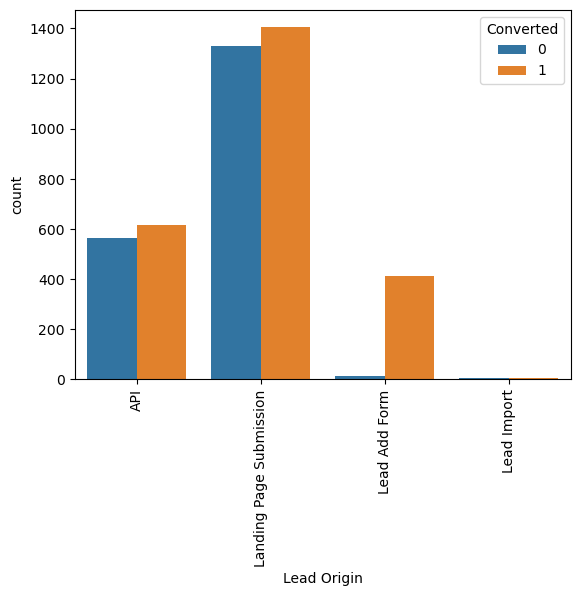

In [613]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
xticks(rotation = 90)

#### Inference
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.<br>


__To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.__

### Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Direct Traffic'),
  Text(2, 0, 'Google'),
  Text(3, 0, 'Organic Search'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Social Media'),
  Text(9, 0, 'WeLearn'),
  Text(10, 0, 'Live Chat'),
  Text(11, 0, 'Click2call'),
  Text(12, 0, 'testone'),
  Text(13, 0, 'Press_Release')])

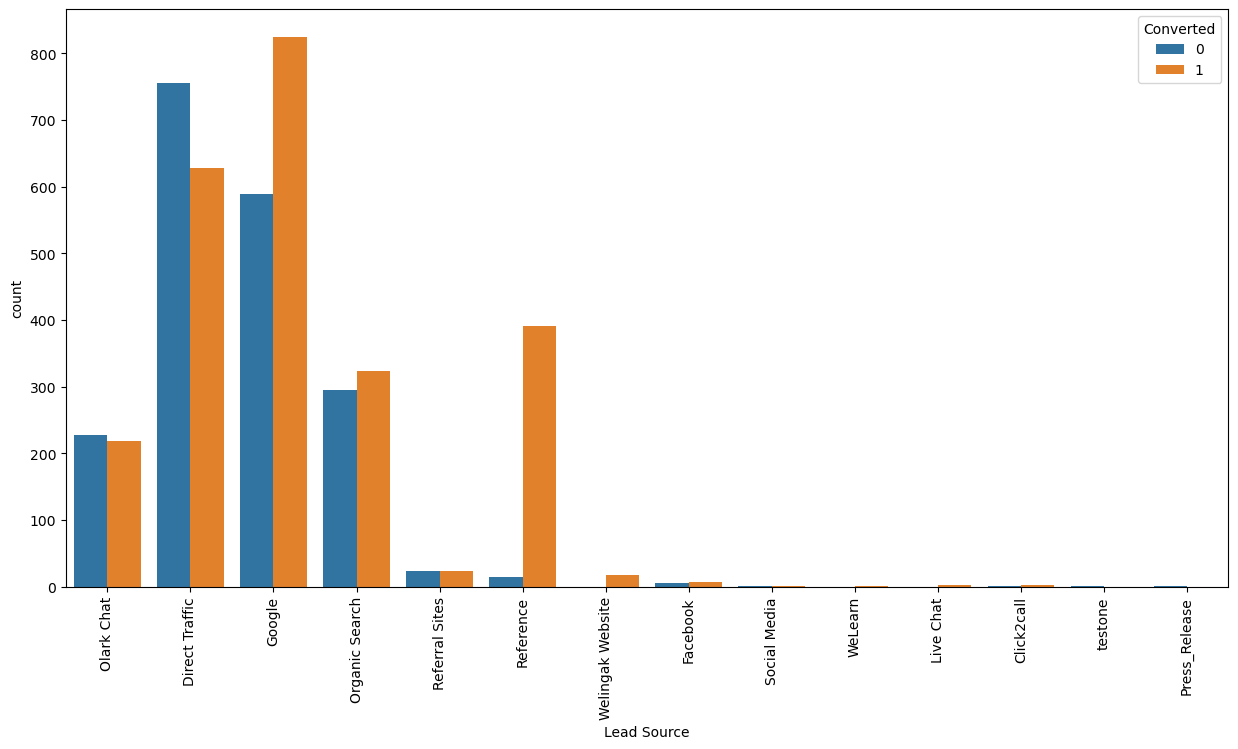

In [617]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

In [619]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Direct Traffic'),
  Text(2, 0, 'Google'),
  Text(3, 0, 'Organic Search'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

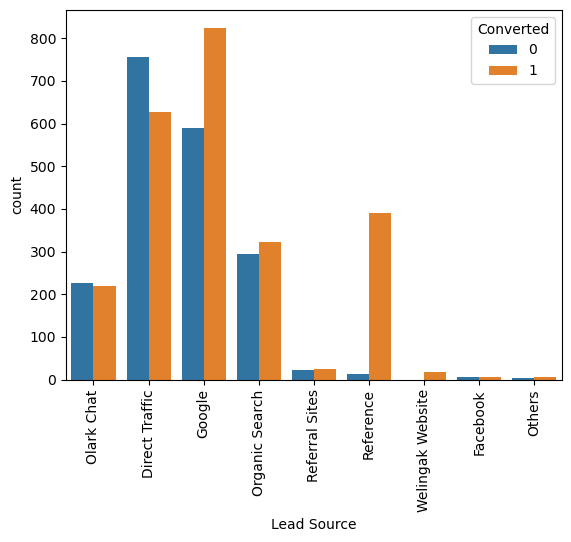

In [621]:
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

#### Inference
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

__To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google  leads and generate more leads from reference and welingak website.__

### Do Not Email & Do Not Call

<Axes: xlabel='Do Not Call', ylabel='count'>

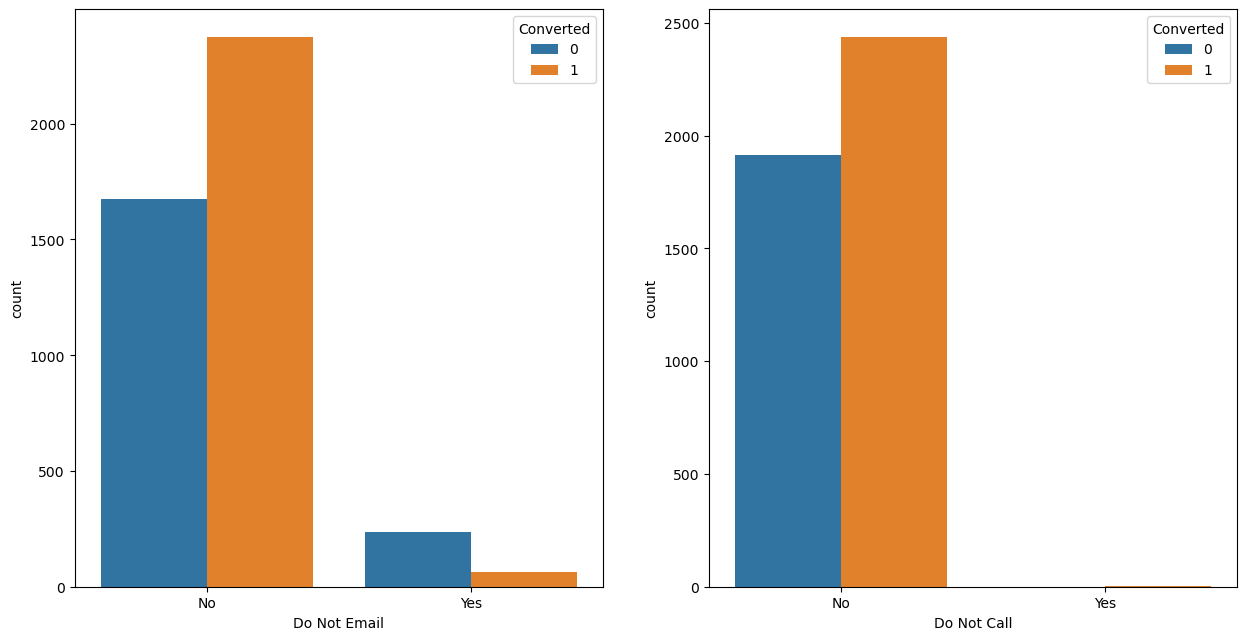

In [625]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])

### Total Visits

In [628]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    4354.000000
mean        3.808682
std         5.294923
min         0.000000
5%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        18.000000
max       251.000000
Name: TotalVisits, dtype: float64

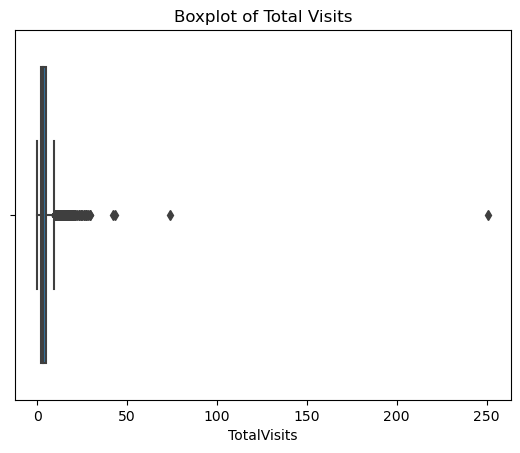

In [630]:
sns.boxplot(x=data['TotalVisits'])
plt.title('Boxplot of Total Visits')
plt.show()

In [632]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [634]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

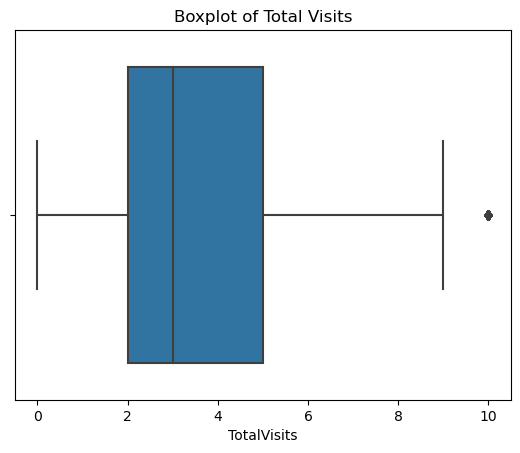

In [636]:
sns.boxplot(x=data['TotalVisits'])
plt.title('Boxplot of Total Visits')
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

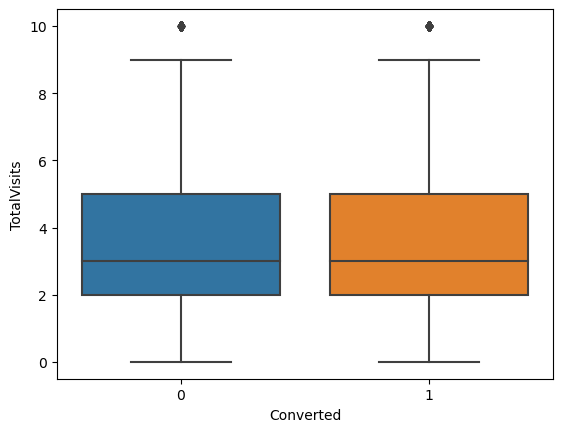

In [638]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

#### Inference
1. Median for converted and not converted leads are the same.

__Nothng conclusive can be said on the basis of Total Visits.__

### Total time spent on website

In [642]:
data['Total Time Spent on Website'].describe()

count    4354.000000
mean      594.821314
std       579.054824
min         0.000000
25%        66.000000
50%       351.000000
75%      1102.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

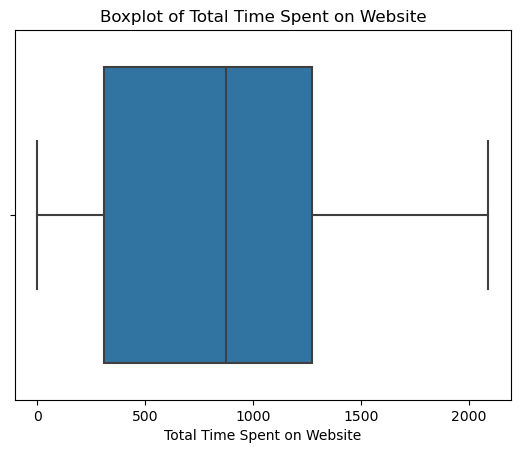

In [280]:
sns.boxplot(x=data['Total Time Spent on Website'])
plt.title('Boxplot of Total Time Spent on Website')
plt.show()

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

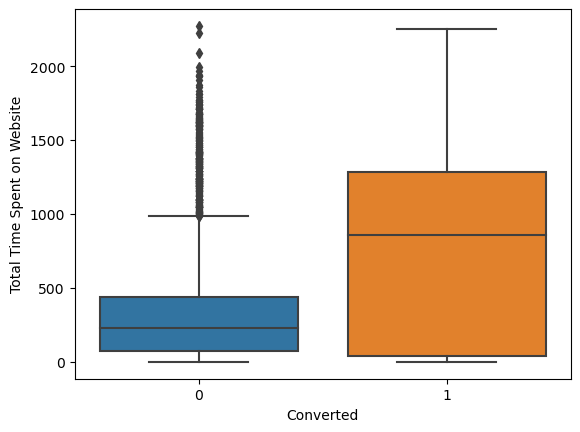

In [646]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

#### Inference
1. Leads spending more time on the weblise are more likely to be converted.

__Website should be made more engaging to make leads spend more time.__

### Page views per visit

In [650]:
data['Page Views Per Visit'].describe()

count    4354.000000
mean        2.610923
std         2.079434
min         0.000000
25%         1.330000
50%         2.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

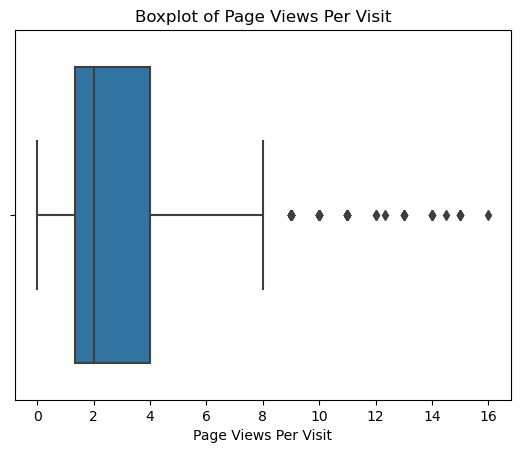

In [652]:
sns.boxplot(x=data['Page Views Per Visit'])
plt.title('Boxplot of Page Views Per Visit')
plt.show()

In [292]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [654]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

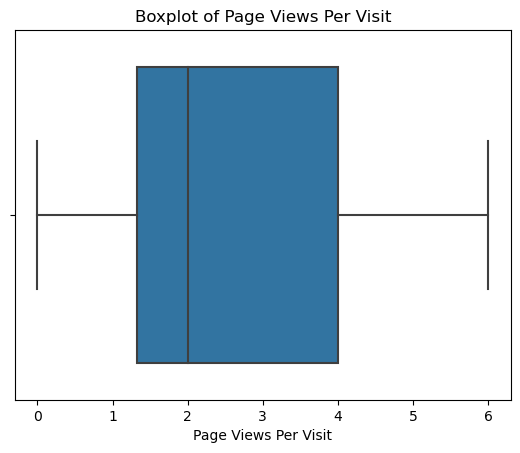

In [656]:
sns.boxplot(x='Page Views Per Visit', data=data)
plt.title('Boxplot of Page Views Per Visit')
plt.show()

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

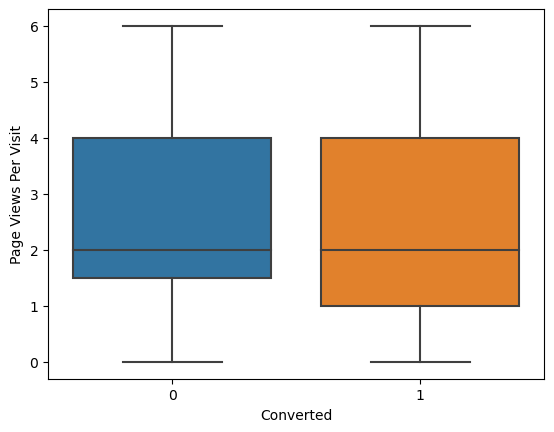

In [658]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

#### Inference
1. Median for converted and unconverted leads is the same.

__Nothing can be said specifically for lead conversion from Page Views Per Visit __

### Last Activity

In [662]:
data['Last Activity'].describe()

count         4354
unique          16
top       SMS Sent
freq          1704
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Form Submitted on Website'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'View in browser link Clicked'),
  Text(9, 0, 'Email Bounced'),
  Text(10, 0, 'Olark Chat Conversation'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

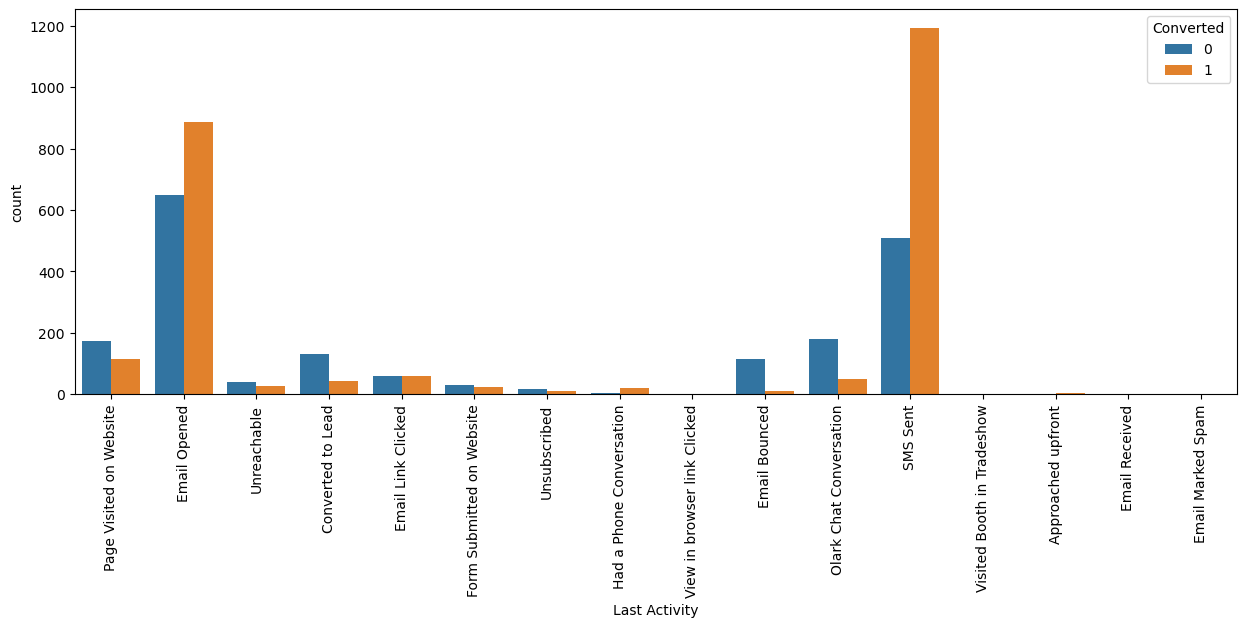

In [664]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [666]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Form Submitted on Website'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Other_Activity'),
  Text(8, 0, 'Email Bounced'),
  Text(9, 0, 'Olark Chat Conversation'),
  Text(10, 0, 'SMS Sent')])

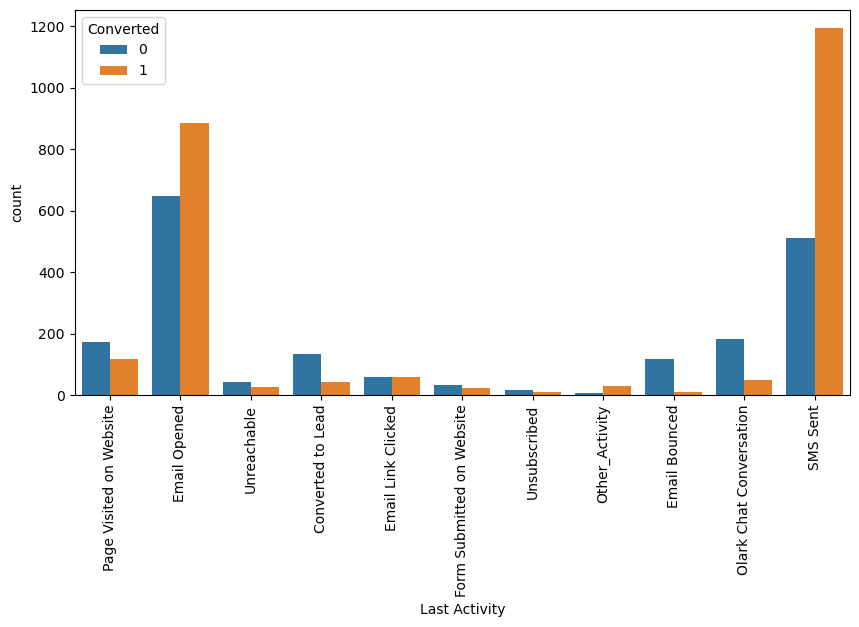

In [668]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

#### Inference
1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.b

### Country

In [672]:
data.Country.describe()

count      4354
unique       28
top       India
freq       4213
Name: Country, dtype: object

### Inference
Most values are 'India' no such inference can be drawn

### Specialization

In [674]:
data.Specialization.describe()

count       4354
unique        19
top       Others
freq         823
Name: Specialization, dtype: object

In [322]:
data['Specialization'] = data['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'Travel and Tourism'),
  Text(5, 0, 'Marketing Management'),
  Text(6, 0, 'Banking, Investment And Insurance'),
  Text(7, 0, 'Finance Management'),
  Text(8, 0, 'International Business'),
  Text(9, 0, 'Human Resource Management'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'IT Projects Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'E-Business'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'Rural and Agribusiness')])

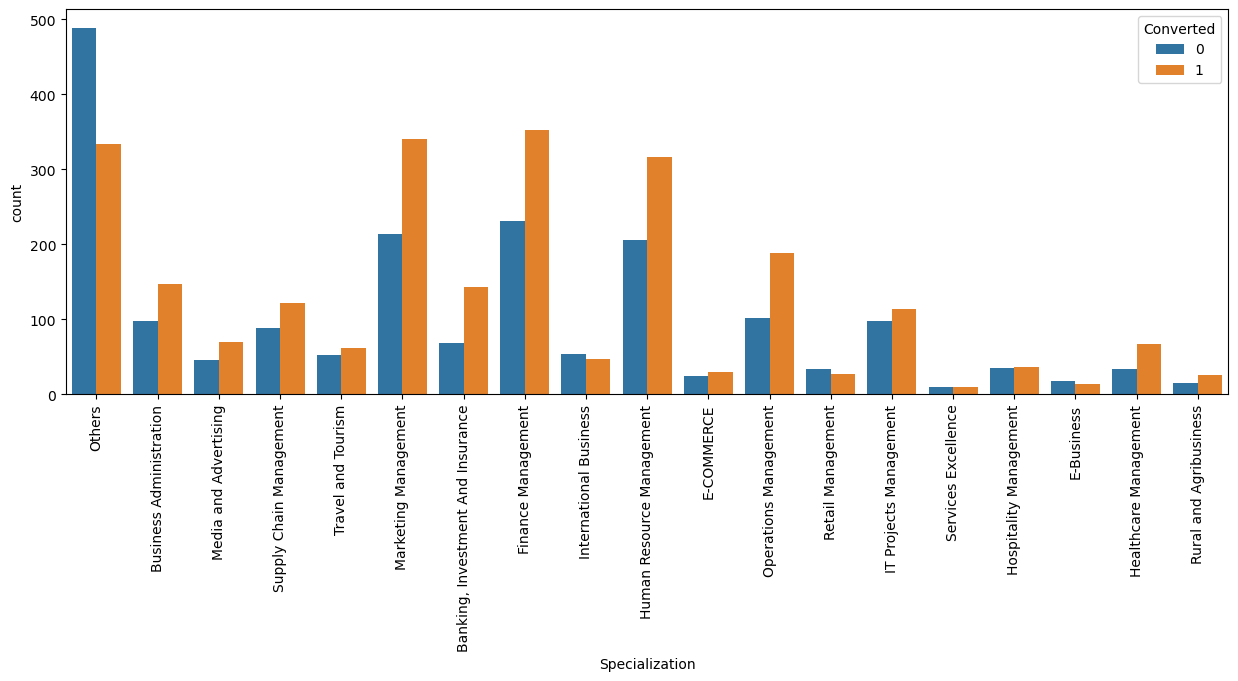

In [676]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = data)
xticks(rotation = 90)

#### Inference
1. Focus should be more on the Specialization with high conversion rate.

### Occupation

In [680]:
data['What is your current occupation'].describe()

count           4354
unique             6
top       Unemployed
freq            3483
Name: What is your current occupation, dtype: object

In [682]:
data['What is your current occupation'] = data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other_Occupation'),
  Text(5, 0, 'Housewife')])

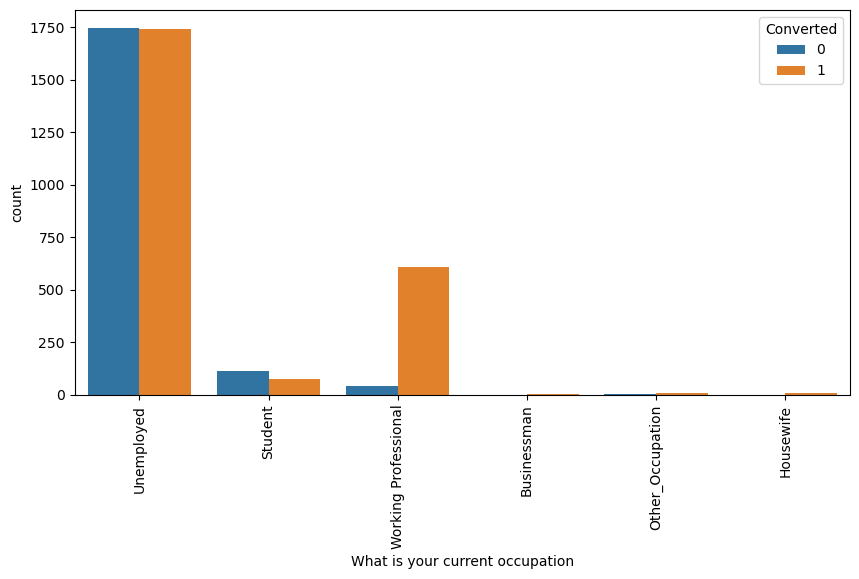

In [684]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)
xticks(rotation = 90)

 ### Inference
1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

### What matters most to you in choosing a course

In [688]:
data['What matters most to you in choosing a course'].describe()

count                        4354
unique                          3
top       Better Career Prospects
freq                         4352
Name: What matters most to you in choosing a course, dtype: object

### Inference
Most entries are 'Better Career Prospects'.
No Inference can be drawn with this parameter.

### Search

In [691]:
data.Search.describe()

count     4354
unique       2
top         No
freq      4347
Name: Search, dtype: object

### Magazine

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter

In [695]:
data.Magazine.describe()

count     4354
unique       1
top         No
freq      4354
Name: Magazine, dtype: object

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### Newspaper Article

In [699]:
data['Newspaper Article'].describe()

count     4354
unique       2
top         No
freq      4353
Name: Newspaper Article, dtype: object

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### X Education Forums

In [705]:
data['X Education Forums'].describe()

count     4354
unique       1
top         No
freq      4354
Name: X Education Forums, dtype: object

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

In [707]:
data['Newspaper'].describe()

count     4354
unique       2
top         No
freq      4353
Name: Newspaper, dtype: object

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

In [709]:
data['Digital Advertisement'].describe()

count     4354
unique       2
top         No
freq      4352
Name: Digital Advertisement, dtype: object

In [711]:
data['Through Recommendations'].describe()

count     4354
unique       2
top         No
freq      4348
Name: Through Recommendations, dtype: object

### Receive More Updates About Our Courses

In [715]:
data['Receive More Updates About Our Courses'].describe()

count     4354
unique       1
top         No
freq      4354
Name: Receive More Updates About Our Courses, dtype: object

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

#### Tags

In [717]:
data.Tags.describe()

count                                    4354
unique                                     25
top       Will revert after reading the email
freq                                     2006
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Will revert after reading the email'),
  Text(2, 0, 'Ringing'),
  Text(3, 0, 'In confusion whether part time or DLP'),
  Text(4, 0, 'Busy'),
  Text(5, 0, 'Already a student'),
  Text(6, 0, 'Diploma holder (Not Eligible)'),
  Text(7, 0, 'Graduation in progress'),
  Text(8, 0, 'switched off'),
  Text(9, 0, 'Lost to EINS'),
  Text(10, 0, 'number not provided'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'invalid number'),
  Text(13, 0, 'Interested  in full time MBA'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'wrong number given'),
  Text(16, 0, 'opp hangup'),
  Text(17, 0, 'Still Thinking'),
  Text(18, 0, 'in touch with EINS'),
  Text(19, 0, 'Shall take in the next coming month'),
  Text(20, 0, 'Lateral student'),
  Text(21, 0, 'Interested in Next batch'),
  Text(22, 0, 'Recognition issue

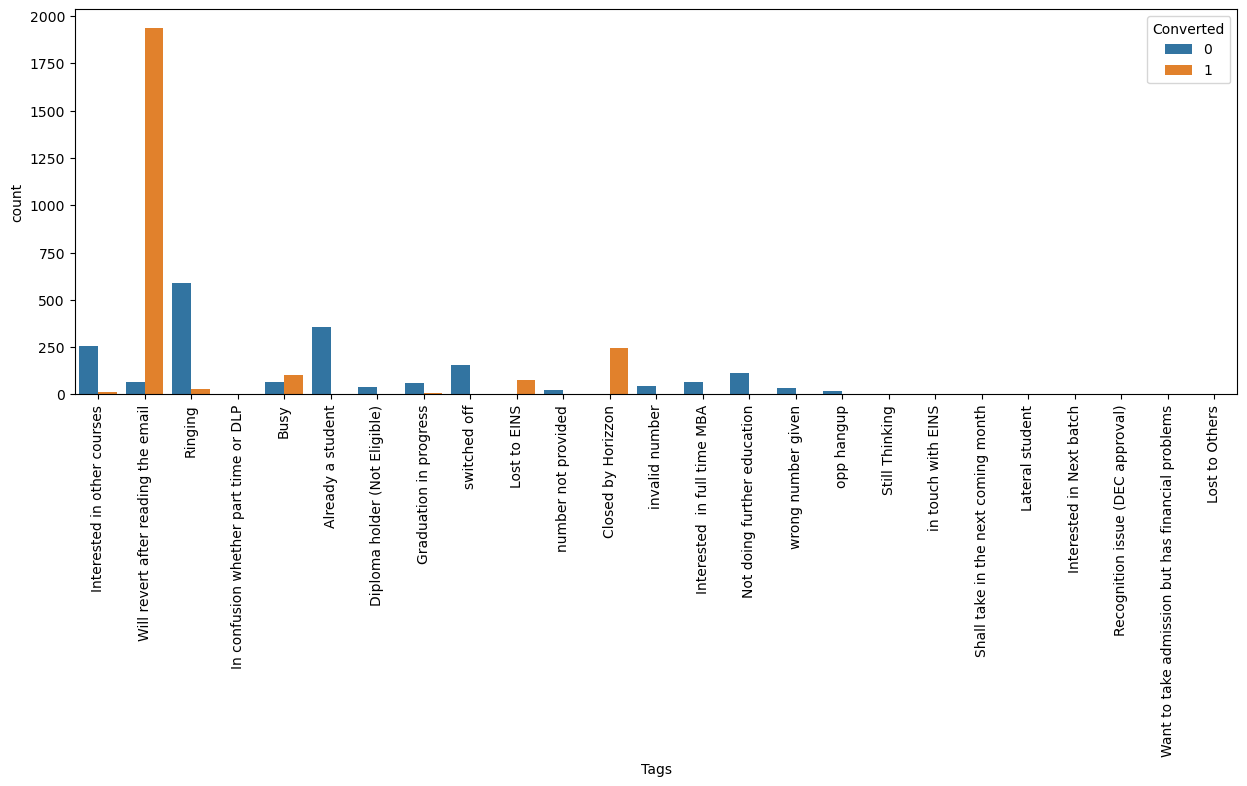

In [719]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

In [721]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Will revert after reading the email'),
  Text(2, 0, 'Ringing'),
  Text(3, 0, 'Other_Tags'),
  Text(4, 0, 'Busy'),
  Text(5, 0, 'Already a student'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'Lost to EINS'),
  Text(8, 0, 'Closed by Horizzon'),
  Text(9, 0, 'invalid number'),
  Text(10, 0, 'Interested  in full time MBA'),
  Text(11, 0, 'Not doing further education'),
  Text(12, 0, 'wrong number given')])

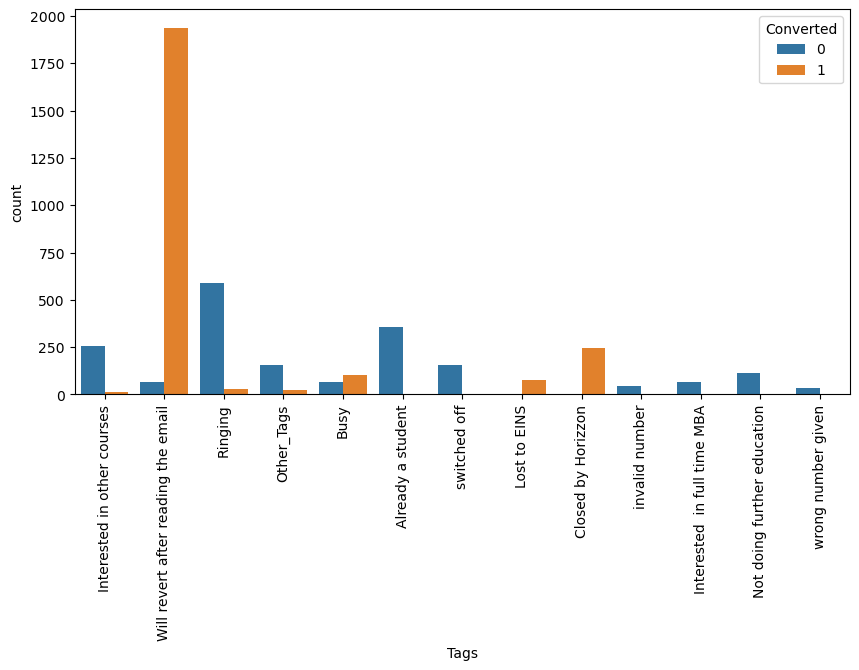

In [723]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

### Lead Quality

In [725]:
data['Lead Quality'].describe()

count         4354
unique           5
top       Might be
freq          1519
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Might be'),
  Text(2, 0, 'Not Sure'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

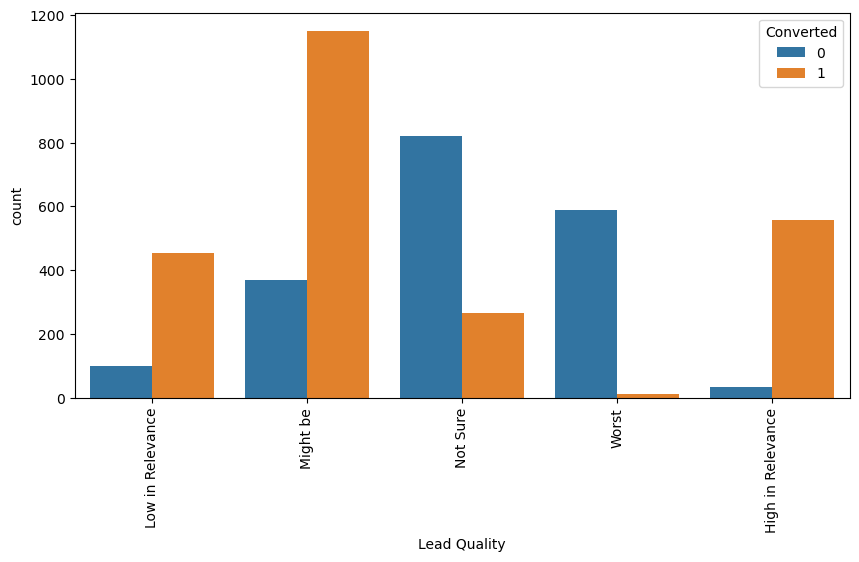

In [727]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data)
xticks(rotation = 90)

### Update me on Supply Chain Content

In [729]:
data['Update me on Supply Chain Content'].describe()

count     4354
unique       1
top         No
freq      4354
Name: Update me on Supply Chain Content, dtype: object

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### Get updates on DM Content

In [731]:
data['Get updates on DM Content'].describe()

count     4354
unique       1
top         No
freq      4354
Name: Get updates on DM Content, dtype: object

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### I agree to pay the amount through cheque

In [733]:
data['I agree to pay the amount through cheque'].describe()

count     4354
unique       1
top         No
freq      4354
Name: I agree to pay the amount through cheque, dtype: object

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### A free copy of Mastering The Interview

In [735]:
data['A free copy of Mastering The Interview'].describe()

count     4354
unique       2
top         No
freq      2735
Name: A free copy of Mastering The Interview, dtype: object

### Inference
Most entries are 'No'.
No Inference can be drawn with this parameter.

### City

In [737]:
data.City.describe()

count       4354
unique         6
top       Mumbai
freq        2993
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Other Metro Cities'),
  Text(2, 0, 'Other Cities'),
  Text(3, 0, 'Thane & Outskirts'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

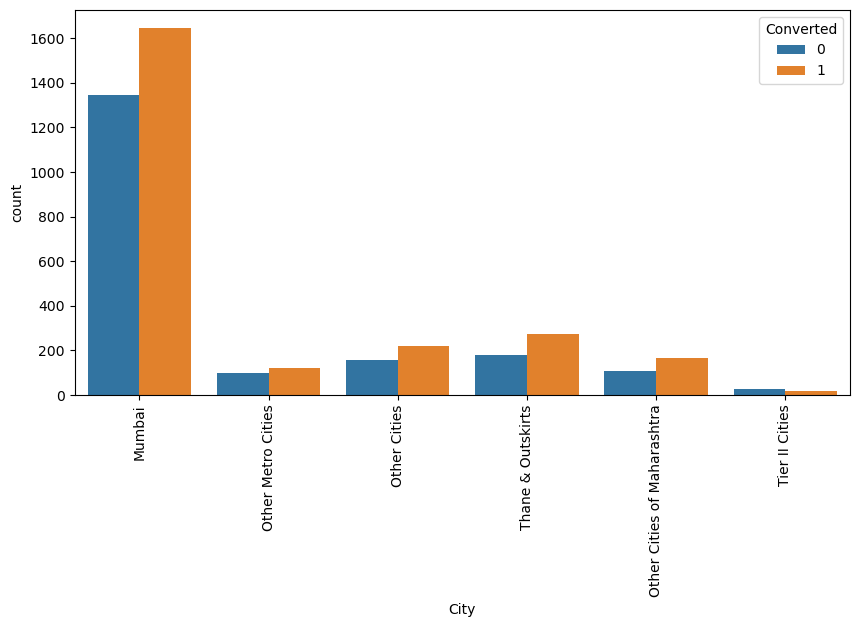

In [750]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = data)
xticks(rotation = 90)

### Inference
Most leads are from mumbai with around 30% conversion rate.

### Last Notable Activity

In [743]:
data['Last Notable Activity'].describe()

count         4354
unique          14
top       SMS Sent
freq          1453
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Email Link Clicked'),
  Text(3, 0, 'Unreachable'),
  Text(4, 0, 'Unsubscribed'),
  Text(5, 0, 'Page Visited on Website'),
  Text(6, 0, 'Had a Phone Conversation'),
  Text(7, 0, 'Email Bounced'),
  Text(8, 0, 'SMS Sent'),
  Text(9, 0, 'Olark Chat Conversation'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'View in browser link Clicked'),
  Text(12, 0, 'Email Received'),
  Text(13, 0, 'Email Marked Spam')])

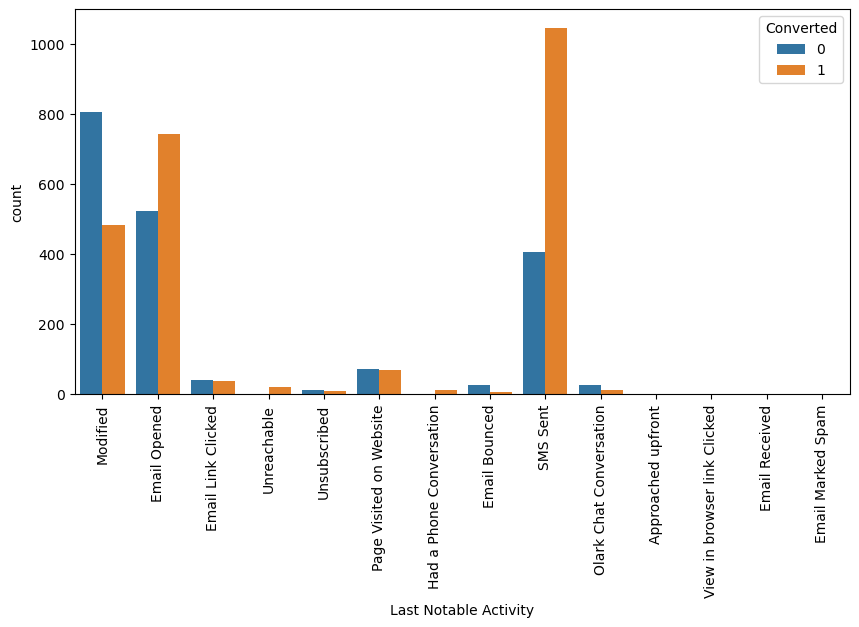

In [745]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
xticks(rotation = 90)

## Results

__Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis__

In [748]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'], axis=1)

In [752]:
data.shape

(4354, 16)

In [754]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Low in Relevance,Mumbai,Modified


### Data Preparation

#### Converting some binary variables (Yes/No) to 1/0

In [758]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = data[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [761]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True, dtype=int)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [765]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [767]:
data =data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [769]:
data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,No,No,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,No,No,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,No,No,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,No,No,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,No,No,1,2.0,1640,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [771]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)

In [773]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,No,No,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,No,No,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,No,No,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,No,No,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,No,No,2.0,1640,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [775]:
# Putting response variable to y
y = data['Converted']

y.head()

0    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [777]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [809]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4584,No,No,0.888005,0.612028,0.290907,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5617,No,No,-1.272851,-1.029308,-1.425005,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1095,No,No,-0.552566,-0.101970,-0.281063,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3166,No,No,-0.192423,-0.523487,0.290907,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
401,No,No,0.527863,0.866659,1.434849,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [849]:
# Checking the Churn Rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

56.06338998621957

We have almost 57% conversion

In [852]:
import statsmodels.api as sm

In [866]:
# Logistic regression model
logm1 = sm.GLM(y_train_numeric, X_train_encoded_const, family=sm.families.Binomial())
result = logm1.fit()
(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     2964
Model Family:                Binomial   Df Model:                           82
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -384.03
Date:                Thu, 07 Aug 2025   Deviance:                       768.06
Time:                        12:21:51   Pearson chi2:                 2.50e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6750
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   17.3429   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
TotalVisits                                              0.4143      0.172      2.411      0.016       0.078       0.751
Total Time Spent on Website                              0.9865      0.117      8.414      0.000       0.757       1.216
Page Views Per Visit                                    -0.3792      0.181     -2.098      0.036      -0.734      -0.025
Lead Origin_Landing Page Submission                      0.5456      0.394      1.386      0.166      -0.226       1.317
Lead Origin_Lead Add Form                                0.5512      2.541      0.217      0.828      -4.429       5.532
Lead Origin_Lead Import                                 27.0524   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                   -24.8273   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.4205      0.269      1.560      0.119      -0.108       0.949
Lead Source_Olark Chat                                   1.7029      0.496      3.431      0.001       0.730       2.676
Lead Source_Organic Search                               0.7154      0.367      1.952      0.051      -0.003       1.434
Lead Source_Others                                       1.6732      2.361      0.709      0.479      -2.955       6.301
Lead Source_Reference                                    1.8855      2.591      0.728      0.467      -3.193       6.964
Lead Source_Referral Sites                               1.2199      0.819      1.490      0.136      -0.385       2.825
Lead Source_Welingak Website                            21.9482   3.29e+04      0.001      0.999   -6.45e+04    6.46e+04
Last Activity_Email Bounced                             -1.3003      1.276     -1.019      0.308      -3.802       1.201
Last Activity_Email Link Clicked                        -1.4290      1.134     -1.260      0.208      -3.652       0.794
Last Activity_Email Opened                              -1.6409      0.704     -2.331      0.020      -3.020      -0.261
Last Activity_Form Submitted on Website                 -0.7501      0.923     -0.813      0.416      -2.559       1.059
Last Activity_Olark Chat Conversation                   -0.9130      0.760     -1.201      0.230      -2.402       0.576
Last Activity_Other_Activity                            -2.1750      1.502     -1.448      0.148      -5.119       0.769
Last Activity_Page Visited on Website                   -1.1635      0.793     -1.468      0.142      -2.717       0.390
Last Activity_SMS Sent                                   0

In [872]:
print(y_train_numeric.dtype)
print(X_train_encoded_const.dtypes)

float64
const                                                   float64
TotalVisits                                             float64
Total Time Spent on Website                             float64
Page Views Per Visit                                    float64
Lead Origin_Landing Page Submission                       int32
Lead Origin_Lead Add Form                                 int32
Lead Origin_Lead Import                                   int32
Lead Source_Facebook                                      int32
Lead Source_Google                                        int32
Lead Source_Olark Chat                                    int32
Lead Source_Organic Search                                int32
Lead Source_Others                                        int32
Lead Source_Reference                                     int32
Lead Source_Referral Sites                                int32
Lead Source_Welingak Website                              int32
Last Activity_Email Bounced     

In [876]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd

# Step 1: Encode categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Step 2: Convert y to numeric if not already
y_train_numeric = pd.to_numeric(y_train, errors='coerce')

# Step 3: Drop rows with NaN in y
X_train_encoded = X_train_encoded.loc[y_train_numeric.notna()]
y_train_numeric = y_train_numeric.loc[y_train_numeric.notna()]

# Step 4: Fit RFE
logreg = LogisticRegression(max_iter=1000)  # Increase iterations if needed
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train_encoded, y_train_numeric)

# Step 5: Show selected features
selected_features = X_train_encoded.columns[rfe.support_]
print("Selected features:\n", selected_features)

Selected features:
 Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Had a Phone Conversation', 'Do Not Email_Yes'],
      dtype='object')


In [878]:
rfe.support_

array([False,  True, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True])

In [880]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 24),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', False, 46),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', False, 47),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', False, 44),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', False, 20),
 ('Lead Source_Reference', False, 22),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Welingak Website', False, 15),
 ('Last Activity_Email Bounced', False, 16),
 ('Last Activity_Email Link Clicked', False, 48),
 ('Last Activity_Email Opened', False, 17),
 ('Last Activity_Form Submitted on Website', False, 63),
 ('Last Activity_Olark Chat Conversation', False, 32),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 56),
 ('Last Activity_SMS Sent',

In [884]:
col = X_train_encoded.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Had a Phone Conversation', 'Do Not Email_Yes'],
      dtype='object')

In [912]:
# Check if 'Do Not Email_Yes' exists in X_train columns
if 'Do Not Email_Yes' in X_train.columns:
    # Convert boolean column to int if needed
    X_train['Do Not Email_Yes'] = X_train['Do Not Email_Yes'].astype(int)
else:
    # If the column is missing, remove it from col if present, or ignore
    col = [c for c in col if c != 'Do Not Email_Yes']

# Ensure all columns in col are in X_train columns (to avoid other KeyErrors)
col = [c for c in col if c in X_train.columns]

# Now select columns safely and add constant
X_train_sm = sm.add_constant(X_train[col])

# Fit the GLM model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3032
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -431.92
Date:                Thu, 07 Aug 2025   Deviance:                       863.85
Time:                        12:52:54   Pearson chi2:                 2.88e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6646
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.8511      0.236    -12.094      0.000      -3.313      -2.389
Total Time Spent on Website                        0.9348      0.107      8.711      0.000       0.725       1.145
Lead Origin_Lead Add Form                          2.3236      1.749      1.328      0.184      -1.105       5.752
Lead Source_Olark Chat                             1.1180      0.334      3.346      0.001       0.463       1.773
Lead Source_Reference                             -0.0447      1.827     -0.024      0.980      -3.625       3.536
Last Activity_SMS Sent                             1.3137      0.211      6.215      0.000       0.899       1.728
Tags_Busy                                          2.2827      0.309      7.399      0.000       1.678       2.887
Tags_Closed by Horizzon                            7.3459      1.034      7.102      0.000       5.319       9.373
Tags_Lost to EINS                                  7.1037      1.110      6.398      0.000       4.927       9.280
Tags_Ringing                                      -1.3445      0.341     -3.941      0.000      -2.013      -0.676
Tags_Will revert after reading the email           5.2455      0.261     20.106      0.000       4.734       5.757
Tags_switched off                                 -1.7571      0.639     -2.752      0.006      -3.009      -0.506
Tags_wrong number given                          -21.3207   1.52e+04     -0.001      0.999   -2.98e+04    2.98e+04
Lead Quality_Worst                                -2.7411      0.664     -4.129      0.000      -4.042      -1.440
Last Notable Activity_Had a Phone Conversation    24.3424   2.13e+04      0.001      0.999   -4.17e+04    4.17e+04
==================================================================================================================
"""

In [935]:
col1 = [item for item in col if item != 'Tags_invalid number']

In [937]:
col1

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Reference',
 'Last Activity_SMS Sent',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_switched off',
 'Tags_wrong number given',
 'Lead Quality_Worst',
 'Last Notable Activity_Had a Phone Conversation']

In [941]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3032
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -431.92
Date:                Thu, 07 Aug 2025   Deviance:                       863.85
Time:                        13:03:39   Pearson chi2:                 2.88e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6646
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.8511      0.236    -12.094      0.000      -3.313      -2.389
Total Time Spent on Website                        0.9348      0.107      8.711      0.000       0.725       1.145
Lead Origin_Lead Add Form                          2.3236      1.749      1.328      0.184      -1.105       5.752
Lead Source_Olark Chat                             1.1180      0.334      3.346      0.001       0.463       1.773
Lead Source_Reference                             -0.0447      1.827     -0.024      0.980      -3.625       3.536
Last Activity_SMS Sent                             1.3137      0.211      6.215      0.000       0.899       1.728
Tags_Busy                                          2.2827      0.309      7.399      0.000       1.678       2.887
Tags_Closed by Horizzon                            7.3459      1.034      7.102      0.000       5.319       9.373
Tags_Lost to EINS                                  7.1037      1.110      6.398      0.000       4.927       9.280
Tags_Ringing                                      -1.3445      0.341     -3.941      0.000      -2.013      -0.676
Tags_Will revert after reading the email           5.2455      0.261     20.106      0.000       4.734       5.757
Tags_switched off                                 -1.7571      0.639     -2.752      0.006      -3.009      -0.506
Tags_wrong number given                          -21.3207   1.52e+04     -0.001      0.999   -2.98e+04    2.98e+04
Lead Quality_Worst                                -2.7411      0.664     -4.129      0.000      -4.042      -1.440
Last Notable Activity_Had a Phone Conversation    24.3424   2.13e+04      0.001      0.999   -4.17e+04    4.17e+04
==================================================================================================================
"""

In [949]:
col2 = [item for item in col1 if item != 'Tags_wrong number given']

In [951]:
col2

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Reference',
 'Last Activity_SMS Sent',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_switched off',
 'Lead Quality_Worst',
 'Last Notable Activity_Had a Phone Conversation']

In [953]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3033
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -434.40
Date:                Thu, 07 Aug 2025   Deviance:                       868.81
Time:                        13:05:53   Pearson chi2:                 2.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6640
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.9440      0.236    -12.497      0.000      -3.406      -2.482
Total Time Spent on Website                        0.9377      0.107      8.753      0.000       0.728       1.148
Lead Origin_Lead Add Form                          2.3704      1.780      1.331      0.183      -1.119       5.860
Lead Source_Olark Chat                             1.1519      0.336      3.427      0.001       0.493       1.811
Lead Source_Reference                             -0.0566      1.859     -0.030      0.976      -3.699       3.586
Last Activity_SMS Sent                             1.2806      0.209      6.116      0.000       0.870       1.691
Tags_Busy                                          2.3942      0.306      7.834      0.000       1.795       2.993
Tags_Closed by Horizzon                            7.4310      1.034      7.184      0.000       5.404       9.458
Tags_Lost to EINS                                  7.1611      1.107      6.472      0.000       4.992       9.330
Tags_Ringing                                      -1.2300      0.338     -3.644      0.000      -1.892      -0.568
Tags_Will revert after reading the email           5.3415      0.260     20.552      0.000       4.832       5.851
Tags_switched off                                 -1.6434      0.637     -2.581      0.010      -2.891      -0.396
Lead Quality_Worst                                -2.6813      0.667     -4.017      0.000      -3.989      -1.373
Last Notable Activity_Had a Phone Conversation    23.4369   1.29e+04      0.002      0.999   -2.53e+04    2.53e+04
==================================================================================================================
"""

In [955]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4584    0.993700
5617    0.929845
1095    0.009166
3166    0.960354
401     0.961216
7113    0.976182
4505    0.993290
7456    0.974928
4532    0.983263
7198    0.001456
dtype: float64

In [957]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99370003, 0.92984479, 0.00916618, 0.96035406, 0.96121552,
       0.97618247, 0.99328958, 0.97492782, 0.98326306, 0.00145577])

In [959]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.993700,4584
1,1,0.929845,5617
2,0,0.009166,1095
3,1,0.960354,3166
4,1,0.961216,401


In [961]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.993700,4584,1
1,1,0.929845,5617,1
2,0,0.009166,1095,0
3,1,0.960354,3166,1
4,1,0.961216,401,1


In [963]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1293   75]
 [  63 1616]]


In [965]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9547095503774204


In [967]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,15.98
3,Lead Source_Reference,15.52
9,Tags_Will revert after reading the email,1.98
4,Last Activity_SMS Sent,1.91
0,Total Time Spent on Website,1.48
2,Lead Source_Olark Chat,1.31
6,Tags_Closed by Horizzon,1.21
8,Tags_Ringing,1.18
5,Tags_Busy,1.09
12,Last Notable Activity_Had a Phone Conversation,1.08


In [969]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [971]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9624776652769506

In [973]:
# Let us calculate specificity
TN / float(TN+FP)

0.9451754385964912

In [975]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05482456140350877


In [979]:
# positive predictive value 
print (TP / float(TP+FP))

0.9556475458308693


In [981]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9535398230088495


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [985]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [987]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

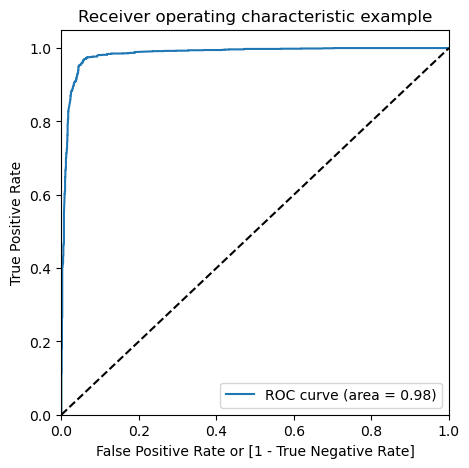

In [989]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [992]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.993700,4584,1,1,1,1,1,1,1,1,1,1,1
1,1,0.929845,5617,1,1,1,1,1,1,1,1,1,1,1
2,0,0.009166,1095,0,1,0,0,0,0,0,0,0,0,0
3,1,0.960354,3166,1,1,1,1,1,1,1,1,1,1,1
4,1,0.961216,401,1,1,1,1,1,1,1,1,1,1,1


In [994]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.551034  1.000000  0.000000
0.1   0.1  0.924844  0.985110  0.850877
0.2   0.2  0.946177  0.976772  0.908626
0.3   0.3  0.955694  0.973794  0.933480
0.4   0.4  0.955694  0.970220  0.937865
0.5   0.5  0.954710  0.962478  0.945175
0.6   0.6  0.953397  0.953544  0.953216
0.7   0.7  0.951756  0.948183  0.956140
0.8   0.8  0.948802  0.942823  0.956140
0.9   0.9  0.918937  0.872543  0.975877


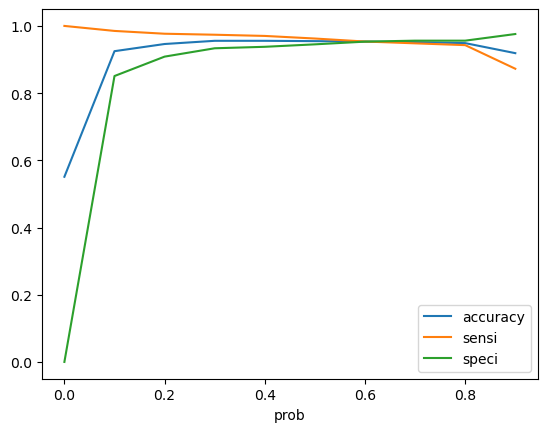

In [996]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [998]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.993700,4584,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.929845,5617,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.009166,1095,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.960354,3166,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.961216,401,1,1,1,1,1,1,1,1,1,1,1,1


In [1000]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.993700,4584,1,1,1,1,1,1,1,1,1,1,1,1,99
1,1,0.929845,5617,1,1,1,1,1,1,1,1,1,1,1,1,93
2,0,0.009166,1095,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.960354,3166,1,1,1,1,1,1,1,1,1,1,1,1,96
4,1,0.961216,401,1,1,1,1,1,1,1,1,1,1,1,1,96


In [1002]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1004]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9767718880285885

In [1006]:
# Let us calculate specificity
TN / float(TN+FP)

0.908625730994152

In [1008]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09137426900584796


In [1010]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9291784702549575


In [1012]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9695787831513261


## Precision and Recall

In [1015]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1293,   75],
       [  63, 1616]], dtype=int64)

In [1017]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9556475458308693

In [1019]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9624776652769506

In [1021]:
from sklearn.metrics import precision_score, recall_score

In [1023]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9556475458308693

In [1025]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9624776652769506

In [1027]:
from sklearn.metrics import precision_recall_curve

In [1029]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       1
 4       1
        ..
 3042    1
 3043    1
 3044    1
 3045    1
 3046    1
 Name: Converted, Length: 3047, dtype: int64,
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 3042    1
 3043    1
 3044    1
 3045    1
 3046    1
 Name: predicted, Length: 3047, dtype: int64)

In [1031]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

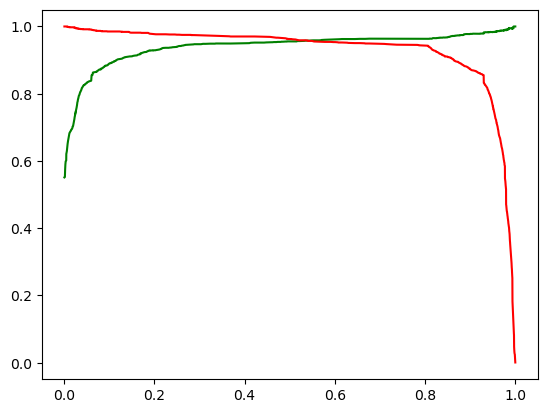

In [1033]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [1037]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
dtype=int
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4584,No,No,0.888005,0.612028,0.290907,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5617,No,No,-1.272851,-1.029308,-1.425005,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1095,No,No,-0.552566,-0.101970,-0.281063,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3166,No,No,-0.192423,-0.523487,0.290907,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
401,No,No,0.527863,0.866659,1.434849,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1039]:
X_test = X_test[col2]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Had a Phone Conversation
4123,2.135864,1,0,1,0,0,1,0,0,0,0,0,0
4216,-1.022917,1,0,1,0,0,1,0,0,0,0,0,0
8905,-1.022917,0,1,0,0,0,0,0,0,0,0,1,0
7971,-0.583616,0,0,0,1,0,0,0,1,0,0,0,0
964,1.663442,0,0,0,0,0,0,0,0,1,0,0,0


In [1041]:
X_test_sm = sm.add_constant(X_test)

In [1043]:
y_test_pred = res.predict(X_test_sm)

In [1045]:
y_test_pred[:10]

4123    0.999850
4216    0.997105
8905    0.004353
7971    0.031050
964     0.981244
6842    0.997853
5991    0.949067
1447    0.986013
2456    0.002805
2629    0.977073
dtype: float64

In [1047]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1049]:
# Let's see the head
y_pred_1.head()

,0
4123,0.999850
4216,0.997105
8905,0.004353
7971,0.031050
964,0.981244


In [1051]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1053]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1055]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1057]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1059]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4123,0.999850
1,1,4216,0.997105
2,0,8905,0.004353
3,0,7971,0.031050
4,1,964,0.981244


In [1061]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1065]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID', 'Converted', 'Converted_prob'])

In [1067]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,4123,1,0.999850
1,4216,1,0.997105
2,8905,0,0.004353
3,7971,0,0.031050
4,964,1,0.981244


In [1069]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [1071]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,4123,1,0.999850,1
1,4216,1,0.997105,1
2,8905,0,0.004353,0
3,7971,0,0.031050,0
4,964,1,0.981244,1


In [1073]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9495026778882938

In [1075]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[494,  51],
       [ 15, 747]], dtype=int64)

In [1077]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1079]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9803149606299213

In [1081]:
# Let us calculate specificity
TN / float(TN+FP)

0.9064220183486239